In [15]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import shutil
import cv2


import numpy as np



In [16]:
from tensorflow.keras.models import load_model
model = load_model('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\model_6ingredients_food_10epoch_v2.h5')
#dictionary to label all traffic signs class.
classes = {0: 'The Main Ingredient is AVOCADO',
 1: 'The Main Ingredient is BANANA',
 2: 'The Main Ingredient is BONIATO',
 3: 'The Main Ingredient is BROCOLLI',
 4: 'The Main Ingredient is CHICKEN',
 5: 'The Main Ingredient is EGGS'}



nutrients = {0: '\n100g of AVOCADO \nCalories = 160\n Carbs = 8.5g(20%)\n Fats = 15g(76%)\n Proteins = 9.5g(20%)',
 1: '\n100g of BANANA \nCalories =89g\n Carbs = 23g(95%)\n Fats = 0.3g(1%)\n Proteins = 1g(4%)',
 2: '\n100g of BONIATO \nCalories = 72\n Carbs = 14g(88%)\n Fats = 0g(0%)\n Proteins = 2g(12%)',
 3: '\n100g of BROCOLLI \nCalories = 34\n Carbs = 7g(70%)\n Fats = 0g(0%)\n Proteins = 3g(30%)',
 4: '\n100g of CHICKEN \nCalories = 145\n Carbs = 0g(0%)\n Fats = 6g(21%)\n Proteins = 22g(78%)',
 5: '\n100g of EGGS \nCalories = 141\n Carbs = 2g(8%)\n Fats = 10g(40%)\n Proteins = 13g(52%)'}


In [17]:
os.chdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp')

os.getcwd()



'C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp'

In [18]:
#initialise GUI
top=tk.Tk()
top.geometry('1200x700')
top.title('Food Pokedex')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
label.place(relx=0.75, rely=0.2, anchor='n')
label2=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
label2.place(relx=0.75, rely=0.3, anchor='n')
sign_image = Label(top)
sign_image.place(relx=0.5, rely=0.2, anchor='n')


gui_path = '/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/your-project/temp'

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    if "avocados" in image.filename:
        temp_name=r'avocados'
    else:
        temp_name=r'other'
    try:
        os.mkdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp\\banana')
    except:
        pass    
    os.chdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp\\banana')
    image.save(f"{temp_name}001.png")
    gui_path = '/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/your-project/temp'
    os.chdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp')
    gui_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=gui_path, target_size=(224,224), classes=['avocados', "banana","boniato","brocolli","chicken","eggs"], batch_size=10)
    imgs, labels = next(gui_batch)
    
    try:
        shutil.rmtree('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp\\banana')
    except:
        pass
    
    #image = image.resize((224,224))
    #image = numpy.expand_dims(image, axis=0)
    #image = numpy.array(image)
    #image = image/255
    pred = model.predict_classes(imgs)[0]
    sign = classes[pred]
    sign2 = nutrients[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign)
    label2.configure(foreground='#011638', text=sign2)
    label.place(relx=0.75, rely=0.2, anchor='n')
    
    
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
    command=lambda: classify(file_path),
    padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.5, rely=0.75, relwidth=0.15, relheight=0.05, anchor='n')


In [19]:
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        sign_image.place(relx=0.25, rely=0.2, anchor='n')
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

In [20]:
def capture_screenshot():                                        #creating a function
    video_capture = cv2.VideoCapture(0)
    # Check success
    if not video_capture.isOpened():
        raise Exception("Could not open video device")
    # Read picture. ret === True on success
    ret, frame = video_capture.read()
    # Close device
    video_capture.release()
    cv2.destroyAllWindows()
    try:
        os.mkdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp\\banana')
    except:
        pass    
    os.chdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp\\banana')
    cv2.imwrite('test001'+'.jpg',frame)
    file_path=('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp\\banana\\test001.jpg')
    uploaded=Image.open(file_path)
    uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
    im=ImageTk.PhotoImage(uploaded)
    sign_image.configure(image=im)
    sign_image.image=im
    sign_image.place(relx=0.25, rely=0.2, anchor='n')
    label.configure(text='')
    try:
        show_classify_button(file_path)
    except:
        pass



In [21]:
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
#upload.pack(side=BOTTOM,pady=50)
upload.place(relx=0.4, rely=0.85, relwidth=0.15, relheight=0.05, anchor='n')

capture=Button(top,text="Take a Pic!",command=capture_screenshot,padx=10,pady=5)
capture.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
#capture.pack(side=BOTTOM,pady=50)
capture.place(relx=0.6, rely=0.85, relwidth=0.15, relheight=0.05, anchor='n')




#sign_image.pack(side=BOTTOM,expand=True)
#label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Food Pokedex",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Found 2 images belonging to 6 classes.
The Main Ingredient is BONIATO
Found 2 images belonging to 6 classes.
The Main Ingredient is CHICKEN
Found 2 images belonging to 6 classes.
The Main Ingredient is CHICKEN
Found 2 images belonging to 6 classes.
The Main Ingredient is AVOCADO
Found 2 images belonging to 6 classes.
The Main Ingredient is CHICKEN
Found 2 images belonging to 6 classes.
The Main Ingredient is CHICKEN
Found 2 images belonging to 6 classes.
The Main Ingredient is EGGS
Found 2 images belonging to 6 classes.
The Main Ingredient is CHICKEN
Found 2 images belonging to 6 classes.
The Main Ingredient is EGGS
Found 2 images belonging to 6 classes.
The Main Ingredient is CHICKEN
Found 2 images belonging to 6 classes.
The Main Ingredient is CHICKEN
Found 2 images belonging to 6 classes.
The Main Ingredient is BONIATO


In [234]:
    global label_packed
    image = Image.open(file_path)
    if "avocados" in image.filename:
        temp_name=r'avocados'
    else:
        temp_name=r'other'
    try:
        os.mkdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp\\banana')
    except:
        pass    
    os.chdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp\\banana')
    image.save(f"{temp_name}001.png")
    gui_path = '/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/your-project/temp'
    os.chdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp')
    gui_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=gui_path, target_size=(224,224), classes=['avocados', "banana","boniato","brocolli","chicken","eggs"], batch_size=10)
    imgs, labels = next(gui_batch)
    
    try:
        shutil.rmtree('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp\\banana')
    except:
        pass
    
    #image = image.resize((224,224))
    #image = numpy.expand_dims(image, axis=0)
    #image = numpy.array(image)
    #image = image/255
    pred = model.predict_classes(imgs)[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

NameError: name 'file_path' is not defined

In [8]:
    image = Image.open('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\data\\valid\\eggs\\eggs_123.jpg')

In [9]:
    try:
        os.mkdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp\\banana')
    except:
        pass
    os.chdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp\\banana')
    image.save(f"test001.png")
    gui_path = '/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/your-project/temp'
    os.chdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp')
    gui_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=gui_path, target_size=(224,224), classes=['avocados', "banana","boniato","brocolli","chicken","eggs"], batch_size=10)
    imgs, labels = next(gui_batch)
    

Found 1 images belonging to 6 classes.


In [10]:
import shutil
try:
    shutil.rmtree('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project\\temp\\banana')
except:
    pass

In [11]:
    pred = model.predict_classes(imgs)[0]
    sign = classes[pred]
    print(sign)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
The Main Ingredient is EGGS


In [12]:
pred

5

In [15]:
button

<tkinter.Button object .!button>

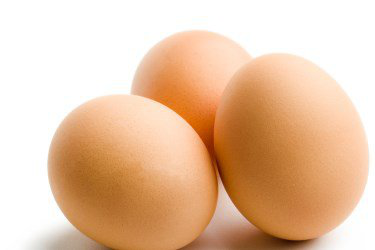

In [13]:
image